# The adverse health effects of air pollution - are we making any progress?

<img src=files/air.jpg width="900">

**Credit:**  [Flickr/E4C](https://www.flickr.com/people/44221799@N08/) 

In [1]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings

warnings.filterwarnings("ignore")  # Suppress all warnings

## Introduction

**Business Context.** Air pollution is a very serious issue that the global population is currently dealing with. The abundance of air pollutants is not only contributing to global warming, but it is also causing problematic health issues to the population. There have been numerous efforts to protect and improve air quality across most nations. However, it seems that we are making very little progress. One of the main causes of this is the fact that the majority of air pollutants are derived from the burning of fossil fuels such as *coal*. Big industries and several other economical and political factors have slowed the progress towards the use of renewable energy by promoting the use of fossil fuels. Nevertheless, if we educate the general population and create awareness of this issue, we will be able to overcome this problem in the future.      

For this case, you have been hired as a data science consultant for an important environmental organization. In order to promote awareness of environmental and greenhouse gas issues, your client is interested in a study of **plausible impacts of air contamination on the health of the global population**. They have gathered some *raw* data provided by the [World Health Organization](https://www.who.int/), [The Institute for Health Metrics and Evaluation](http://www.healthdata.org/) and the [World Bank Group](https://www.worldbank.org/). Your task is to conduct data analysis, search for potential information, and create visualizations that the client can use for their campaigns and grant applications. 

**Analytical Context.** You are given a folder, named ```files``` with *raw* data. This data contains quite a large number of variables and it is in a fairly disorganized state. In addition, one of the datasets contains very poor documentation, segmented into several datasets. Your objective will be to:

1. Extract and clean the relevant data. You will have to manipulate several datasets to obtain useful information for the case. 
2. Conduct Exploratory Data Analysis. You will have to create meaningful plots, formulate meaningful hypotheses and study the relationship between various indicators related to air pollution.

Additionally, the client has some broad questions they would like to answer:
1. Are we making any progress in reducing the amount of emitted pollutants across the globe?
2. Which are the critical regions where we should start environmental campaigns?
3. Are we making any progress in the prevention of deaths related to air pollution?
4. Which demographic characteristics seem to correlate with the number of health-related issues derived from air pollution? 

## Extracting and cleaning relevant data

Let's take a look at the data provided by the client in the ```files``` folder. There, we see another folder  named ```WDI_csv``` with several CSV files corresponding to the World Bank's primary [World Development Indicators](https://datacatalog.worldbank.org/dataset/world-development-indicators). The client stated that this data may contain some useful information relevant to our study, but they have not told us anything aside from that. Thus, we are on our own in finding and extracting the relevant data for our study. This we will do next. 

Let's take a peek at the file ```WDIData.csv```:

In [2]:
WDI_data = pd.read_csv("./files/WDI_csv/WDIData.csv")
print(WDI_data.columns)
print(WDI_data.info())
WDI_data.head()

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377256 entries, 0 to 377255
Data columns (total 65 columns):
Country Name      377256 non-null object
Country Code      377256 non-null object
Indicator Name    377256 non-null object
Indicator Code    377256 non-null object
1960              37395 non-null float64
1961              41211 non-null float64
1

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.428272,87.070576,88.176836,87.342739,89.130121,89.678685,90.273687,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.942103,75.244104,77.162305,75.538976,78.741152,79.665635,80.749293,NaN,NaN,NaN


The data seems to have a large number of indicators dating from 1960. There are also columns containing country names and codes. Notice that the first couple of rows say ```Arab World```, which may indicate that the data contains broad regional data as well. We notice also that there are at least 100,000 entries with ```NaN``` values for each year column.

Since we are interested in environmental indicators, we must get rid of any rows not relevant to our study. However, the number of indicators seems to be quite large and a manual inspection seems impossible. Let's load the file ```WDISeries.csv``` which seems to contain more information about the indicators:

In [3]:
WDI_ids = pd.read_csv("./files/WDI_csv/WDISeries.csv")
print(WDI_ids.columns)
WDI_ids.head()

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,AG.AGR.TRAC.NO,Environment: Agricultural production,"Agricultural machinery, tractors",NaN,Agricultural machinery refers to the number of...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",A tractor provides the power and traction to m...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
1,AG.CON.FERT.PT.ZS,Environment: Agricultural production,Fertilizer consumption (% of fertilizer produc...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
2,AG.CON.FERT.ZS,Environment: Agricultural production,Fertilizer consumption (kilograms per hectare ...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
3,AG.LND.AGRI.K2,Environment: Land use,Agricultural land (sq. km),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agricultural land constitutes only a part of a...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
4,AG.LND.AGRI.ZS,Environment: Land use,Agricultural land (% of land area),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agriculture is still a major sector in many ec...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN


Bingo! The ```WDI_ids``` DataFrame contains a column named ```Topic```. Moreover, it seems that *Environment* is listed as a key topic in the column.

### Exercise 1: (15 min)

Extract all the rows that have the topic key *Environment* in ```WDI_ids```. Add to the resulting DataFrame a new column named ```Subtopic``` which contains the corresponding subtopic of the indicator. For example, the subtopic of ```Environment: Agricultural production``` is ```Agricultural production```. Which subtopics do you think are of interest to us?

**Hint:** Remember that you can apply string methods to Series using the ```str()``` method of ```pandas```. 

**Answer.** Here is one possible solution:

In [4]:
WDI_Env = WDI_ids[WDI_ids["Topic"].str.startswith("Environment:")]
WDI_Env["Subtopic"] = WDI_Env["Topic"].str.replace("Environment: ", "")
print(WDI_Env["Subtopic"].unique())
WDI_Env[["Series Code", "Topic", "Subtopic", "Unit of measure", "Long definition"]]

['Agricultural production' 'Land use' 'Energy production & use'
 'Emissions' 'Biodiversity & protected areas' 'Density & urbanization'
 'Freshwater' 'Natural resources contribution to GDP']


,Series Code,Topic,Subtopic,Unit of measure,Long definition
0,AG.AGR.TRAC.NO,Environment: Agricultural production,Agricultural production,NaN,Agricultural machinery refers to the number of...
1,AG.CON.FERT.PT.ZS,Environment: Agricultural production,Agricultural production,NaN,Fertilizer consumption measures the quantity o...
2,AG.CON.FERT.ZS,Environment: Agricultural production,Agricultural production,NaN,Fertilizer consumption measures the quantity o...
3,AG.LND.AGRI.K2,Environment: Land use,Land use,NaN,Agricultural land refers to the share of land ...
4,AG.LND.AGRI.ZS,Environment: Land use,Land use,NaN,Agricultural land refers to the share of land ...
...,...,...,...,...,...
1322,SP.RUR.TOTL.ZG,Environment: Density & urbanization,Density & urbanization,NaN,Rural population refers to people living in ru...
1323,SP.RUR.TOTL.ZS,Environment: Density & urbanization,Density & urbanization,NaN,Rural population refers to people living in ru...
1324,SP.URB.GROW,Environment: Density & urbanization,Density & urbanization,NaN,Urban population refers to people living in ur...
1325,SP.URB.TOTL,Environment: Density & urbanization,Density & urbanization,NaN,Urban population refers to people living in ur...


We may find several of these subtopics relevant to our study, but probably the most interesting for us now is the ```Emissions``` subtopic.

### Exercise 2: (15 min)

Use the results of Exercise 1 to create a new DataFrame with the history of all emissions indicators for countries and major regions. Call this new DataFrame ```Emissions_df```. How many emissions indicators are in the study?

**Answer.** Here is one possible solution:

In [5]:
# First, we need to extract the code of each indicator of emissions.
# We do this using the data frame obtained in Exercise 1
indi_codes = WDI_Env[WDI_Env["Subtopic"] == "Emissions"]["Series Code"]
print("The number of indicators of emissions is ", len(indi_codes), "//////")
indi_codes = set(indi_codes)

Emissions_df = WDI_data[WDI_data["Indicator Code"].isin(indi_codes)]

Emissions_df.head()

The number of indicators of emissions is  42 //////


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
64,Arab World,ARB,Agricultural methane emissions (% of total),EN.ATM.METH.AG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,Arab World,ARB,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,Arab World,ARB,Agricultural nitrous oxide emissions (% of total),EN.ATM.NOXE.AG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,Arab World,ARB,Agricultural nitrous oxide emissions (thousand...,EN.ATM.NOXE.AG.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,Arab World,ARB,CO2 emissions (kg per 2010 US$ of GDP),EN.ATM.CO2E.KD.GD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.757162,0.770413,0.737665,0.769023,NaN,NaN,NaN,NaN,NaN,NaN


### Exercise 3: (15 min)

The DataFrame ```Emissions_df``` has one column per year of observation. Data in this form is usually referred to as data in *wide format*, as the number of columns is high. However, it might be easier to query and filter the data if we had a single column containing the year in which each indicator was calculated. This way, *each observation will be represented by a single row*. Use the ```pandas``` function [```melt()```](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to reshape the ```Emissions_df``` data into *long format*. The resulting DataFrame should contain a pair of new columns named ```Year``` and ```Indicator Value```:

**Answer.** Here is one possible solution:

In [6]:
# After taking a look at pandas.melt documentation, we first need to select the columns that won't be unpivoted
ids = ["Country Name", "Country Code", "Indicator Name", "Indicator Code"]

# Then, we simply use var_name and value_name to give names to the new columns.
Emissions_df = pd.melt(
    Emissions_df, id_vars=ids, var_name="Year", value_name="Indicator Value"
)
Emissions_df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
0,Arab World,ARB,Agricultural methane emissions (% of total),EN.ATM.METH.AG.ZS,1960,NaN
1,Arab World,ARB,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,1960,NaN
2,Arab World,ARB,Agricultural nitrous oxide emissions (% of total),EN.ATM.NOXE.AG.ZS,1960,NaN
3,Arab World,ARB,Agricultural nitrous oxide emissions (thousand...,EN.ATM.NOXE.AG.KT.CE,1960,NaN
4,Arab World,ARB,CO2 emissions (kg per 2010 US$ of GDP),EN.ATM.CO2E.KD.GD,1960,NaN
...,...,...,...,...,...,...
676363,Zimbabwe,ZWE,"PM2.5 pollution, population exposed to levels ...",EN.ATM.PM25.MC.T2.ZS,Unnamed: 64,NaN
676364,Zimbabwe,ZWE,"PM2.5 pollution, population exposed to levels ...",EN.ATM.PM25.MC.T3.ZS,Unnamed: 64,NaN
676365,Zimbabwe,ZWE,SF6 gas emissions (thousand metric tons of CO2...,EN.ATM.SF6G.KT.CE,Unnamed: 64,NaN
676366,Zimbabwe,ZWE,Total greenhouse gas emissions (% change from ...,EN.ATM.GHGT.ZG,Unnamed: 64,NaN


### Exercise 4: (15 min)

The column ```Indicator Value``` of the new ```Emissions_df``` contains a bunch of ```NaN``` values. Additionally, the ```Year``` column contains an ```Unnamed: 64``` value. What procedure should we follow to clean these missing values in our DataFrame? Proceed with your suggested cleaning process.

**Answer.** Here is one possible solution.

Dropping rows with missing indicator values is permissible here. This is because the information that an indicator was not computed for certain year/country would be *implicit* in the data and we can safely reconstruct it in case we need it. We also notice that the column ```Unnamed:64``` in the original data frame did not have a single non-null value, thus we can drop it entirely.   

In [7]:
# We can simply use the function dropna to remove the selected rows.
Emissions_df = Emissions_df.dropna(subset=["Indicator Value"])
Emissions_df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,59535.396567
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.645736
10,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292
12,Arab World,ARB,CO2 emissions from liquid fuel consumption (% ...,EN.ATM.CO2E.LF.ZS,1960,84.851473
13,Arab World,ARB,CO2 emissions from liquid fuel consumption (kt),EN.ATM.CO2E.LF.KT,1960,50539.802737
...,...,...,...,...,...,...
643097,Zimbabwe,ZWE,"PM2.5 air pollution, population exposed to lev...",EN.ATM.PM25.MC.ZS,2017,100.000000
643098,Zimbabwe,ZWE,"PM2.5 pollution, population exposed to levels ...",EN.ATM.PM25.MC.T1.ZS,2017,0.000000
643099,Zimbabwe,ZWE,"PM2.5 pollution, population exposed to levels ...",EN.ATM.PM25.MC.T2.ZS,2017,8.066920
643100,Zimbabwe,ZWE,"PM2.5 pollution, population exposed to levels ...",EN.ATM.PM25.MC.T3.ZS,2017,100.000000


### Exercise 5: (30 min)

Split the ```Emissions_df``` into two DataFrames, one containing only countries and the other containing only regions. Name these ```Emissions_C_df``` and ```Emissions_R_df``` respectively.

**Hint:** You may want to inspect the file ```WDICountry.csv``` for this task. Region country codes may be found by looking at ```null``` values of the ```Region``` column in ```WDICountry```.

**Answer.** Here is one possible solution:

In [8]:
# First, we load the WDICountry.csv
WDI_countries = pd.read_csv("./files/WDI_csv/WDICountry.csv")
WDI_countries.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data', 'Unnamed: 30'],
      dtype='object')

In [9]:
WDI_countries["Region"].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', nan, 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [40]:
# As suggested by the hint, we can extract the country codes of regions by 
# looking at the null values of the Region column.
Regions = list(WDI_countries[WDI_countries["Region"].isnull()]["Country Code"])

# Then, we create the data frames
Emissions_C_df = Emissions_df[~Emissions_df["Country Code"].isin(Regions)]
Emissions_R_df = Emissions_df[Emissions_df["Country Code"].isin(Regions)]

Emissions_C_df.head()  # /////

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
1981,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,414.371000
1982,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.046057
1984,Afghanistan,AFG,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,0.000000
1985,Afghanistan,AFG,CO2 emissions from gaseous fuel consumption (kt),EN.ATM.CO2E.GF.KT,1960,0.000000
1986,Afghanistan,AFG,CO2 emissions from liquid fuel consumption (% ...,EN.ATM.CO2E.LF.ZS,1960,65.486726


## Finalizing the cleaning for our study

Our data has improved a lot by now. However, since the number of indicators is still quite large, let us focus our study on the following indicators for now:

- **Total greenhouse gas emissions (kt of CO2 equivalent), EN.ATM.GHGT.KT.CE**: The total of greenhouse emissions includes CO2, Methane, Nitrous oxide, among other pollutant gases. Measured in kilotons.


- **CO2 emissions (kt), EN.ATM.CO2E.KT**: Carbon dioxide emissions are those stemming from the burning of fossil fuels and the manufacture of cement. They include carbon dioxide produced during consumption of solid, liquid, and gas fuels and gas flaring. 	


- **Methane emissions (kt of CO2 equivalent), EN.ATM.METH.KT.CE**: Methane emissions are those stemming from human activities such as agriculture and from industrial methane production.


- **Nitrous oxide emissions (kt of CO2 equivalent), EN.ATM.NOXE.KT.CE**: Nitrous oxide emissions are emissions from agricultural biomass burning, industrial activities, and livestock management.


- **Other greenhouse gas emissions, HFC, PFC and SF6 (kt of CO2 equivalent), EN.ATM.GHGO.KT.CE**: Other pollutant gases.


- **PM2.5 air pollution, mean annual exposure (micrograms per cubic meter), EN.ATM.PM25.MC.M3**: Population-weighted exposure to ambient PM2.5 pollution is defined as the average level of exposure of a nation's population to concentrations of suspended particles measuring less than 2.5 microns in aerodynamic diameter, which are capable of penetrating deep into the respiratory tract and causing severe health damage. Exposure is calculated by weighting mean annual concentrations of PM2.5 by population in both urban and rural areas.


- **PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total), EN.ATM.PM25.MC.ZS**: Percent of population exposed to ambient concentrations of PM2.5 that exceed the World Health Organization (WHO) guideline value.

### Exercise 6: (30 min)

For each of the emissions DataFrames, extract the rows corresponding to the above indicators of interest. Replace the long names of the indicators by the short names ```Total```, ```CO2```, ```CH4```, ```N2O```, ```Other```, ```PM2.5```, and ```PM2.5_WHO```. (This will be helpful later when we need to label plots of our data.) 

**Answer.** Here is a possible answer:

In [11]:
# First create a dictionary with the new names of the indicators:
Dict = {
    "EN.ATM.GHGT.KT.CE": "Total",
    "EN.ATM.CO2E.KT": "CO2",
    "EN.ATM.METH.KT.CE": "CH4",
    "EN.ATM.NOXE.KT.CE": "N2O",
    "EN.ATM.GHGO.KT.CE": "Other",
    "EN.ATM.PM25.MC.M3": "PM2.5",
    "EN.ATM.PM25.MC.ZS": "PM2.5_WHO",
}

# Extract the relevant rows
Emissions_C_df = Emissions_C_df[Emissions_C_df["Indicator Code"].isin(Dict.keys())]

# Create a copy of the indicator codes.
copyIndi = Emissions_C_df["Indicator Code"].copy()

# Transform the indicator codes with the new names.
copyIndi.replace(Dict, inplace=True)

# Replace the indicator name with the new names
Emissions_C_df["Indicator Name"] = copyIndi

# Repeat for regions:
Emissions_R_df = Emissions_R_df[Emissions_R_df["Indicator Code"].isin(Dict.keys())]
copyIndi = Emissions_R_df["Indicator Code"].copy()
copyIndi.replace(Dict, inplace=True)
Emissions_R_df["Indicator Name"] = copyIndi

print(Emissions_C_df.info())
Emissions_C_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48059 entries, 1981 to 643097
Data columns (total 6 columns):
Country Name       48059 non-null object
Country Code       48059 non-null object
Indicator Name     48059 non-null object
Indicator Code     48059 non-null object
Year               48059 non-null object
Indicator Value    48059 non-null float64
dtypes: float64(1), object(5)
memory usage: 2.6+ MB
None


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
1981,Afghanistan,AFG,CO2,EN.ATM.CO2E.KT,1960,414.371000
2023,Albania,ALB,CO2,EN.ATM.CO2E.KT,1960,2024.184000
2065,Algeria,DZA,CO2,EN.ATM.CO2E.KT,1960,6160.560000
2191,Angola,AGO,CO2,EN.ATM.CO2E.KT,1960,550.050000
2233,Antigua and Barbuda,ATG,CO2,EN.ATM.CO2E.KT,1960,36.670000
...,...,...,...,...,...,...
643013,"Yemen, Rep.",YEM,PM2.5_WHO,EN.ATM.PM25.MC.ZS,2017,100.000000
643054,Zambia,ZMB,PM2.5,EN.ATM.PM25.MC.M3,2017,27.438035
643055,Zambia,ZMB,PM2.5_WHO,EN.ATM.PM25.MC.ZS,2017,100.000000
643096,Zimbabwe,ZWE,PM2.5,EN.ATM.PM25.MC.M3,2017,22.251671


## Where shall the client start environmental campaigns?

Now the DataFrames ```Emissions_C_df``` and ```Emissions_R_df``` seem to be in a good shape. Let's proceed to conduct some exploratory data analysis so that we can make recommendations to our client.

### Exercise 7: (45 min)

 Let's first calculate some basic information about the main indicators across the globe.

#### 7.1 (15 min)
Compute some basic statistics of the amount of kt of emissions for each of the four main pollutants (```CO2, CH4, N2O, Others```) over the years. Use the ```Emissions_C_df``` data frame. What trends do you see? 

**Answer.** One possible solution is given below: 

In [12]:
# First, we need to transform the Year column to datetime.
Emissions_C_df["Year"] = pd.to_datetime(Emissions_C_df["Year"])
Emissions_C_df["Year"] = Emissions_C_df["Year"].dt.year

# Then, we use the describe function to obtain some basic statistics of the amount of kt of emissions.
mean_df = (
    Emissions_C_df.groupby(["Indicator Name", "Year"])["Indicator Value"]
    .describe()
    .reset_index()
)
mean_df

,Indicator Name,Year,count,mean,std,min,25%,50%,75%,max
0,CH4,1970,203.0,26057.280609,8.082303e+04,0.596744,601.768500,4574.450000,16669.700000,7.810880e+05
1,CH4,1971,203.0,25265.323492,8.142078e+04,0.622194,605.238500,4578.670000,14634.450000,8.138140e+05
2,CH4,1972,203.0,26324.434722,8.357058e+04,0.648717,635.522500,4405.450000,16116.000000,8.257710e+05
3,CH4,1973,203.0,26622.476042,8.351608e+04,0.675492,657.346500,4329.590000,17349.600000,8.269910e+05
4,CH4,1974,203.0,26411.137428,8.399521e+04,0.701368,667.459000,4286.670000,15263.150000,8.308330e+05
...,...,...,...,...,...,...,...,...,...,...
246,Total,2008,179.0,258071.256860,9.508477e+05,5.062560,11732.138850,51876.505000,140971.847000,1.002202e+07
247,Total,2009,178.0,256738.252129,9.808989e+05,5.068208,11925.566911,49535.752940,154765.033793,1.061726e+07
248,Total,2010,175.0,273583.393531,1.044674e+06,5.109678,12118.198459,50724.569637,146305.325085,1.118381e+07
249,Total,2011,178.0,284671.721524,1.089740e+06,5.175981,12069.417354,53290.429622,163212.586424,1.206426e+07


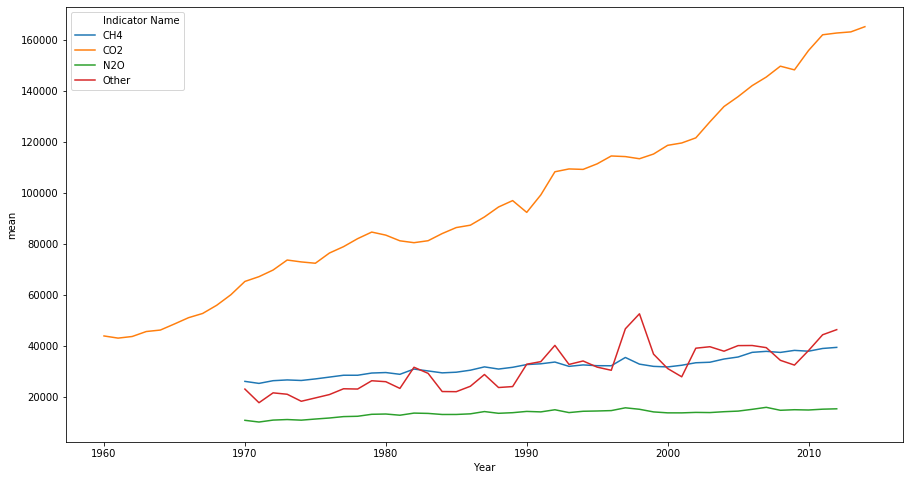

In [13]:
# We can look out for trends using a line plot of the emissions
indi = ["CO2", "CH4", "N2O", "Other"]
plt.figure(figsize=(15, 8))
ax = sns.lineplot(
    x="Year",
    y="mean",
    hue="Indicator Name",
    data=mean_df[mean_df["Indicator Name"].isin(indi)],
)

It seems that the levels of pollutant gases have been increasing over the years. Especially, the levels of CO2 have been increasing dramatically.  

#### 7.2 (15 min)

What can you say about the *distribution* of emissions around the globe over the years? What information can you extract from the *tails* of these distributions over the years?

**Answer.** Let us use boxplots to see the distribution of the emissions over the years.

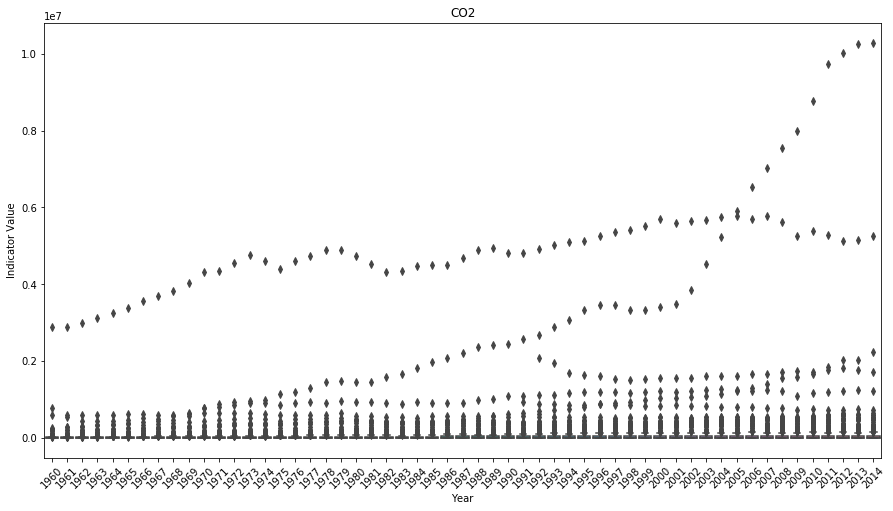

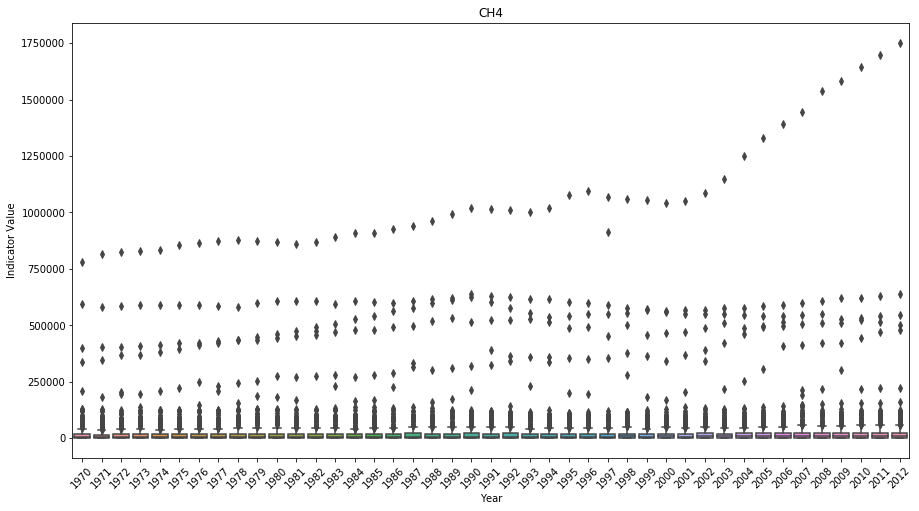

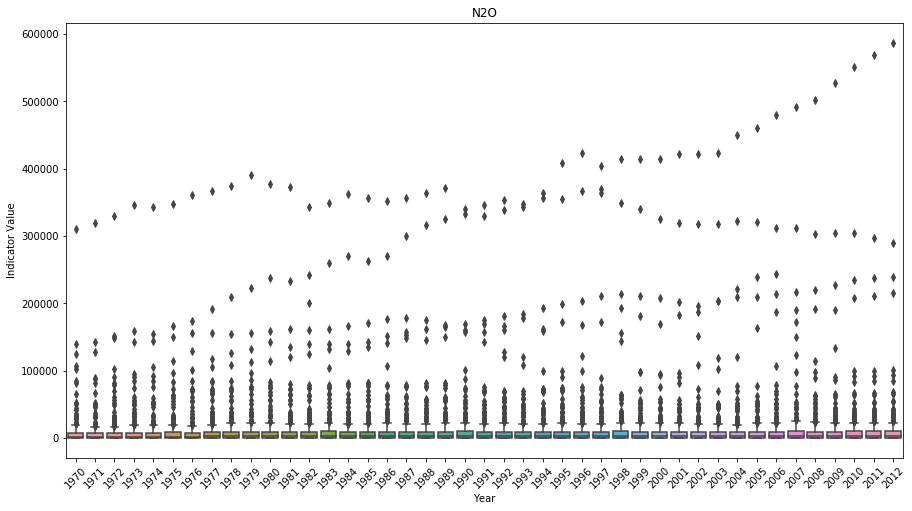

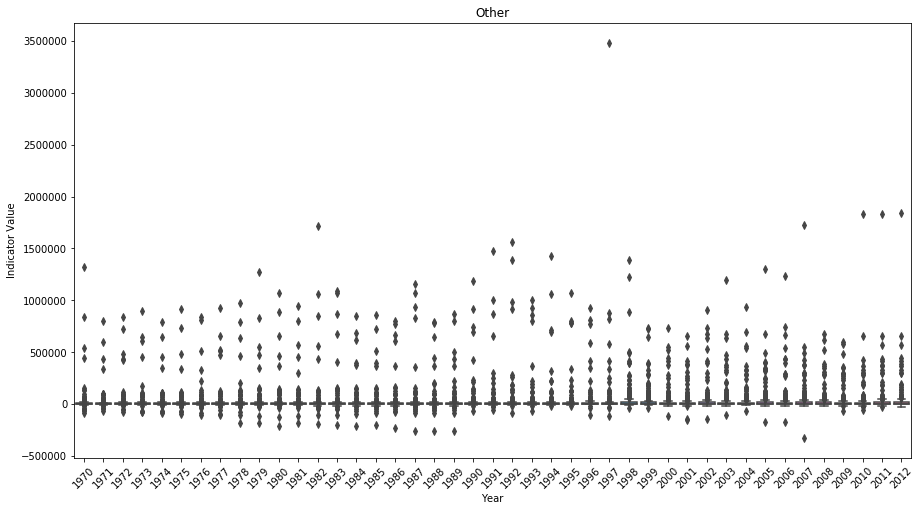

In [14]:
gases = ["CO2", "CH4", "N2O", "Other"]
for gas in gases:
    plt.figure(figsize=(15, 8))
    chart = sns.boxplot(
        x="Year",
        y="Indicator Value",
        data=Emissions_C_df[Emissions_C_df["Indicator Name"] == gas],
    )
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    chart.set_title(gas)
    plt.show()

It seems that there are a few countries that carry the burden of most of the emissions emitted over the years. It will be a good idea to recommend these countries as starting points for environmental campaigns, but we should look at the data in more detail. Even though we saw an increasing trend in emissions over the years in exercise 7.1, it will be interesting to see if this is mainly caused by these few outliers and not by the general population.  

#### 7.3 (15 min)
Compute a plot showing the behavior of each of the four main air pollutants for each of the main global regions in the ```Emissions_R_df``` data frame. The main regions are ```'Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia', 'Middle East & North Africa', 'East Asia & Pacific'``` and ```'North America'```. What conclusions can you make?

**Answer.**

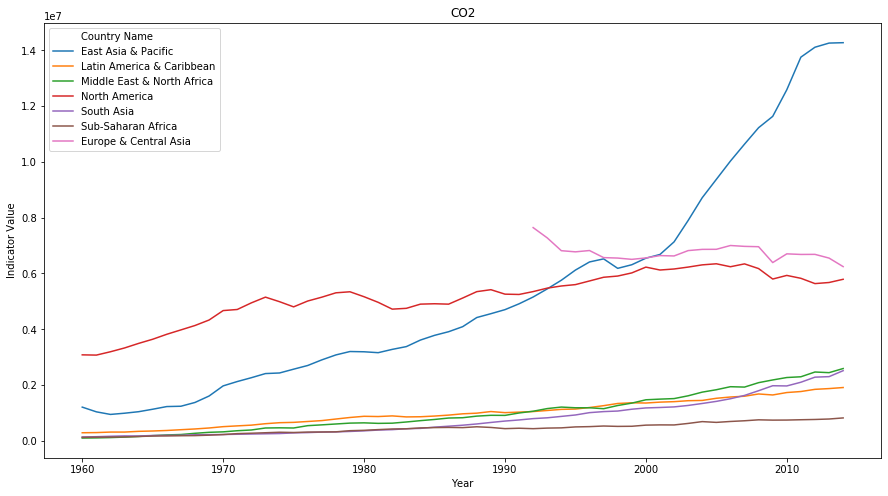

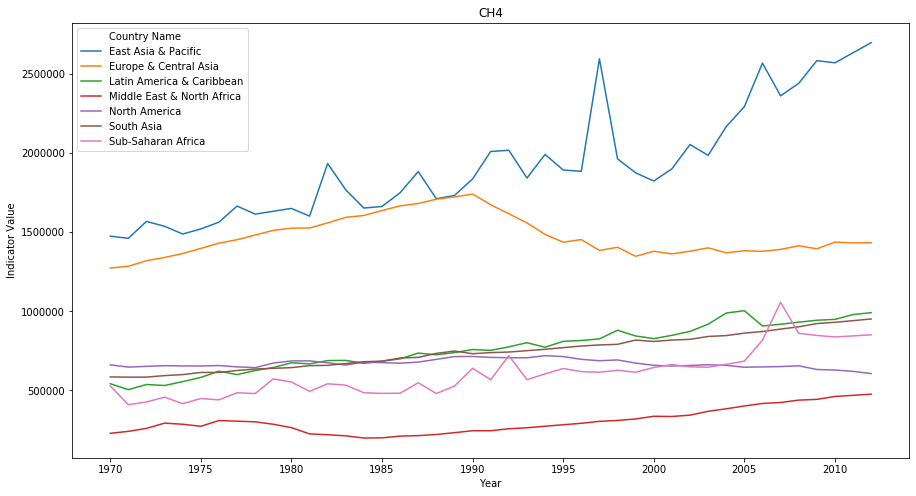

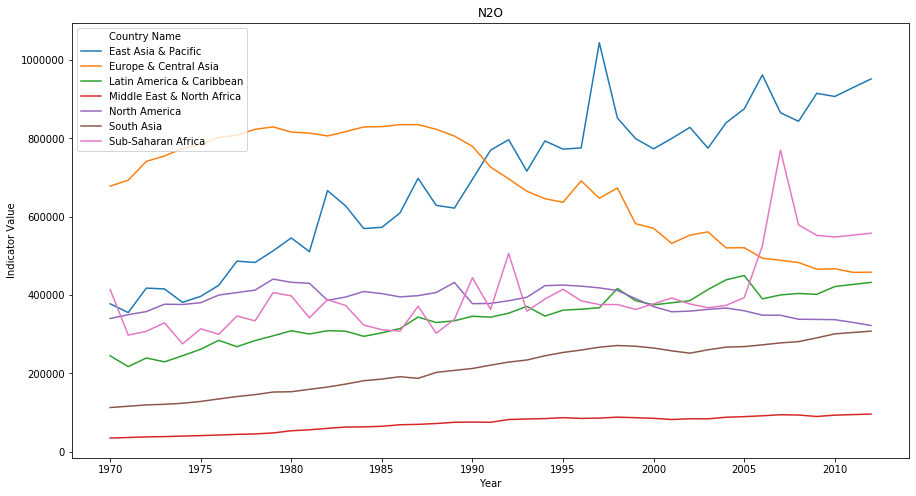

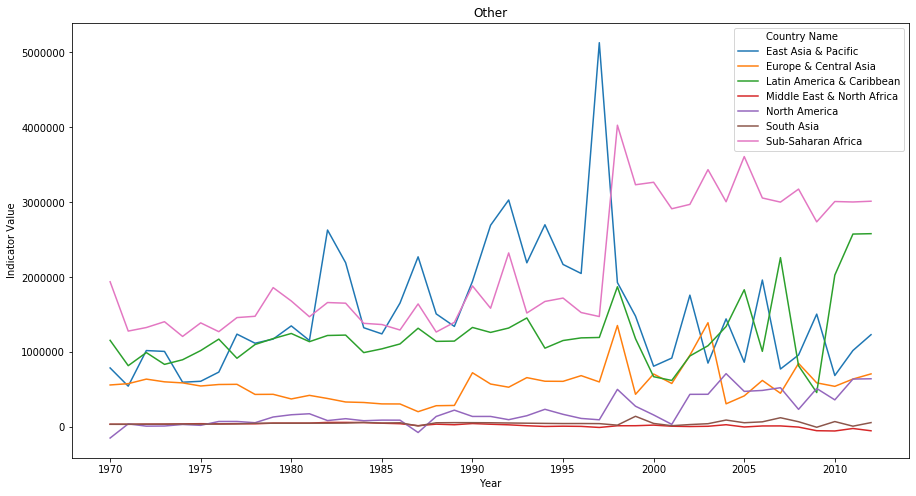

In [15]:
# First, we need to transform the Year column to datetime.
Emissions_R_df["Year"] = pd.to_datetime(Emissions_R_df["Year"])

# Create a list with main regions
regions = [
    "Latin America & Caribbean",
    "South Asia",
    "Sub-Saharan Africa",
    "Europe & Central Asia",
    "Middle East & North Africa",
    "East Asia & Pacific",
    "North America",
]

# Filter the dataframe containing these regions only.
df72 = Emissions_R_df[Emissions_R_df["Country Name"].isin(regions)]

gases = ["CO2", "CH4", "N2O", "Other"]
for gas in gases:
    data = df72[df72["Indicator Name"] == gas]
    plt.figure(figsize=(15, 8))
    ax = sns.lineplot(
        x="Year", y="Indicator Value", hue="Country Name", data=data
    ).set_title(gas)

It seems that countries in East Asia and the Pacific are the worst dealing with pollutant emissions. We also see that Europe and Central Asia have been making some efforts to reduce their emissions. Surprisingly this is not the case with North America and Sub-Saharan Africa, which levels have been increasing over the years as well. 

### Exercise 8: (40 min)

In Exercise 7 we discovered some interesting features of the distribution of the emissions over the years. Let us explore these features in more detail. 

#### 8.1 (20 min)
Which are the top five countries that have been in the top 10 of ```CO2``` emitters over the years? Have any of these countries made efforts to reduce the amount of CO2 emissions over the last 10 years?

**Answer.**

In [16]:
# Here is one possible solution:
df81 = Emissions_C_df[Emissions_C_df["Indicator Name"] == "CO2"]
years = range(1960, 2018)
frames = []

for year in years:
    year_df = df81[df81["Year"] == year]
    frames.append(year_df.nlargest(10, "Indicator Value")["Country Name"])

top10 = pd.concat(frames).value_counts()
top10

United States         55
China                 55
India                 55
Japan                 55
Canada                54
United Kingdom        49
Italy                 46
France                32
Poland                32
Germany               24
South Africa          24
Russian Federation    23
Korea, Rep.           15
Iran, Islamic Rep.    10
Mexico                 9
Ukraine                5
Saudi Arabia           4
Indonesia              2
Spain                  1
Name: Country Name, dtype: int64

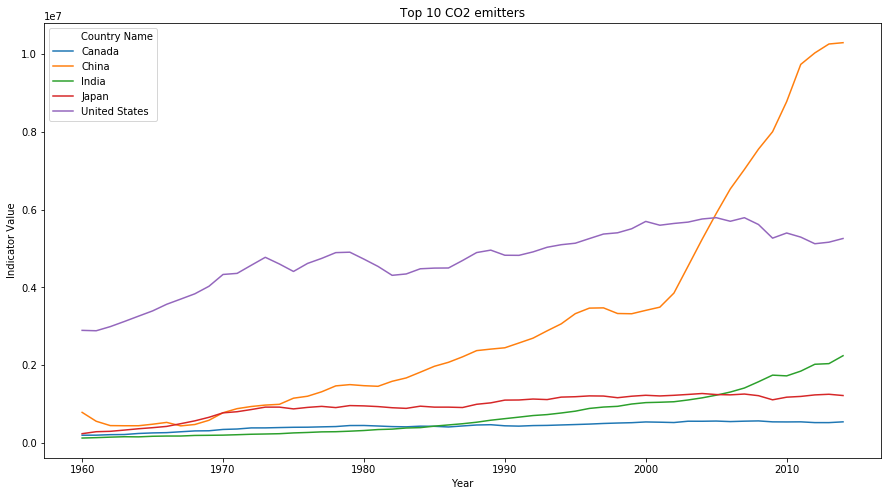

In [17]:
# Let us now see how the emissions of these countries have evolved over the years.
# For this, we can make a simple line plot:
countries = ["China", "United States", "India", "Japan", "Canada"]
df81_2 = df81[df81["Country Name"].isin(countries)]

plt.figure(figsize=(15, 8))
ax = sns.lineplot(
    x="Year", y="Indicator Value", hue="Country Name", data=df81_2
).set_title("Top 10 CO2 emitters")

The top 5 countries that have been in the top 10 are Canada, China, India, Japan and USA. China is by far the country producing the most CO2 emissions since the late 2000s. Prior to that, USA was the highest emitter and it seems they are doing some efforts to reduce their gas emissions over the last 10 years. 
From the plot, we see that the emissions in India have been increasing over the last 10 years. However, it is not clear for Canada and Japan from this plot. Let us make a second plot to very this. 

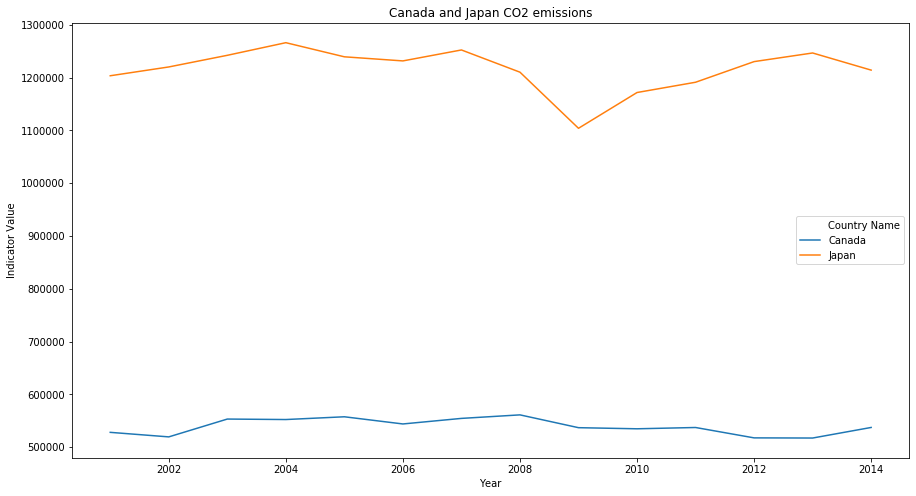

In [18]:
df81_3 = df81_2[df81_2["Country Name"].isin(["Canada", "Japan"])]
df81_3 = df81_3[df81_3["Year"] > 2000]
plt.figure(figsize=(15, 8))
ax = sns.lineplot(
    x="Year", y="Indicator Value", hue="Country Name", data=df81_3
).set_title("Canada and Japan CO2 emissions")

There seems to be no change in the levels of CO2 emitted by Japan and Canada during the last ten years.

#### 8.2 (20 min)

Are these five countries carrying out the burden of most of the emissions emitted over the years globally? Can we say that the rest of the world is making some effort to control their polluted gasses emissions over the years?

**Answer.** For the first part of the question we can sum up the total of CO2 emitted by the top countries over the years and compare them with the rest of the world. 

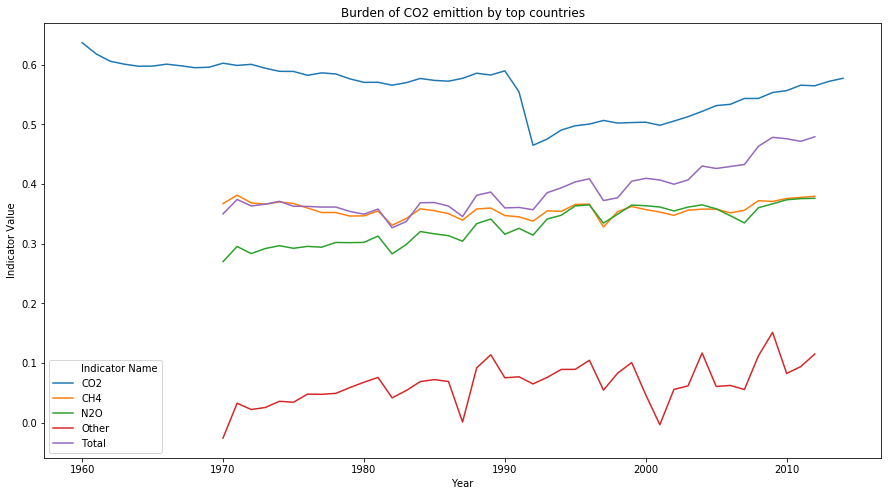

In [19]:
sum1 = Emissions_C_df.groupby(["Year", "Indicator Name"])["Indicator Value"].sum()

countries = ["China", "United States", "India", "Japan", "Canada"]
df82_top = Emissions_C_df[Emissions_C_df["Country Name"].isin(countries)]
sum2 = df82_top.groupby(["Year", "Indicator Name"])["Indicator Value"].sum()
burden = np.divide(sum2, sum1).reset_index()

indi = ["Total", "CO2", "CH4", "N2O", "Other"]
plt.figure(figsize=(15, 8))
ax = sns.lineplot(
    x="Year",
    y="Indicator Value",
    hue="Indicator Name",
    data=burden[burden["Indicator Name"].isin(indi)],
).set_title("Burden of CO2 emittion by top countries")

We can see that these five countries have contributed with  %50~%60 of CO2 emissions over the years. These countries have also contributed to around %40 percent of the total amount of emissions. This is huge given that there are around 212 countries in the study. 

For the second part of the question, we can remove the top countries from the study and re-do the analysis of Exercise 7. 

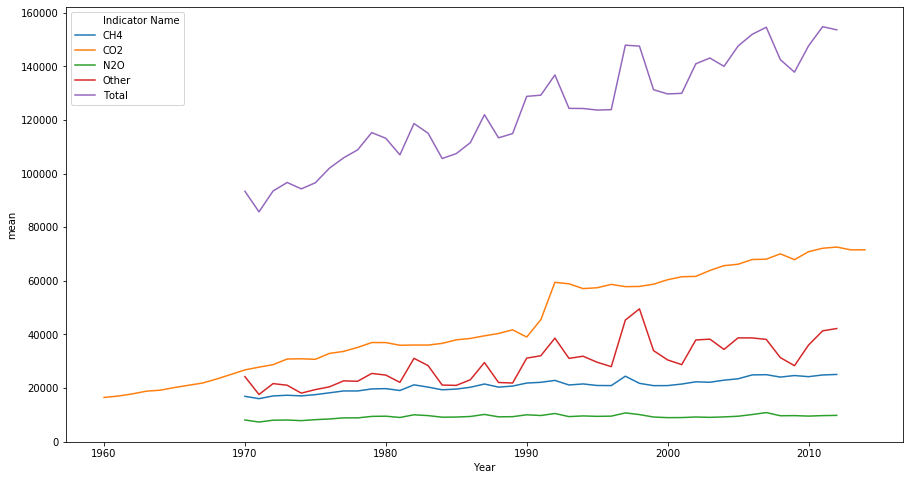

In [20]:
countries = ["China", "United States", "India", "Japan", "Canada"]

df82 = Emissions_C_df[~Emissions_C_df["Country Name"].isin(countries)]

mean_df = (
    df82.groupby(["Indicator Name", "Year"])["Indicator Value"].describe().reset_index()
)

# We can look out for trends using a line plot of the emissions
indi = ["Total", "CO2", "CH4", "N2O", "Other"]
plt.figure(figsize=(15, 8))
ax = sns.lineplot(
    x="Year",
    y="mean",
    hue="Indicator Name",
    data=mean_df[mean_df["Indicator Name"].isin(indi)],
)

We see that the rest of the world has been steadily increasing the total amount of emissions as well. 

## The health impacts of air pollution

### Exercise 9: (25 min)

One of the main contributions of poor health from air pollution is particulate matter. In particular, very small particles (those with a size less than 2.5 micrometres ($\mu$m)) can enter and affect the respiratory system. The ```PM2.5``` indicator measures the average level of exposure of a nation's population to concentrations of these small particles. The ```PM2.5_WHO``` measures the  percentage of the population who are exposed to ambient concentrations of these particles that exceed some thresholds set by the World Health Organization (WHO). In particular, countries with a higher ```PM2.5_WHO``` indicator are more likely to suffer from bad health conditions. 


#### 9.1 (20 min)

The client would like to know if there is any relationship between the ```PM2.5_WHO``` indicator and the level of income of the general population, as well as how this changes over time. What plot(s) might be helpful to solve the client's question?  What conclusion can you draw from your plot(s) to answer their question?

**Hint:** The DataFrame ```WDI_countries``` contains a column named ```Income Group```. 

**Answer.** One possible solution is to segment the data into Income Groups and then plot the distributions of the indicators across each class. Hopefully, we could see some differences across the years.

In [21]:
# As indicated by the hint, let us first create the new column using the Income Group column in WDI_countries.
Emissions_C_df = Emissions_C_df.merge(
    WDI_countries[["Country Code", "Income Group"]], how="inner", on="Country Code"
)
df91 = Emissions_C_df[Emissions_C_df["Indicator Name"] == "PM2.5_WHO"]

For an overview, let's first ignore the year component and look only at the indicator value by income group. We can do this using `groupby()` and `describe()`, as follows:

In [22]:
df91[["Income Group", "Indicator Value"]].groupby(
    "Income Group"
).describe().sort_values(by=("Indicator Value", "mean"))

Indicator Value                                        \
                              count        mean           std         min   
Income Group                                                                
High income                   708.0   77.184224  3.576505e+01    0.000000   
Upper middle income           684.0   98.591258  8.439434e+00    0.000000   
Lower middle income           564.0   99.844565  6.894086e-01   94.210978   
Low income                    372.0  100.000000  5.216969e-14  100.000000   

                                                         
                            25%       50%    75%    max  
Income Group                                             
High income           59.834121   99.6599  100.0  100.0  
Upper middle income   99.999999  100.0000  100.0  100.0  
Lower middle income  100.000000  100.0000  100.0  100.0  
Low income           100.000000  100.0000  100.0  100.0

We can see that it's not unusual for 100% of the population to be exposed to pollution, even in high-income groups. However, while there are no low-income countries which do not expose 100% of their population to this pollution, there are at least some countries in higher-income groups which avoid this pollution.

Now let's see how this changes over time:

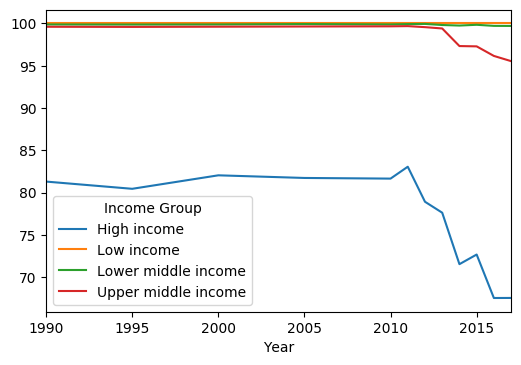

In [23]:
# increase the quality of the image
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

# Here we group by income group and year, looking only at the mean values.
df91[["Income Group", "Year", "Indicator Value"]].groupby(
    ["Year", "Income Group"]
).mean()["Indicator Value"].unstack().plot()

We can see that high-income countries have always exhibited less pollution and that this dropped sharply starting from 2010. There has also been a smaller drop for upper middle-income coountries, but the lower-income countries remain at or close to 100% exposure.

We can also examine this data using boxplots as follows:

[Text(0, 0, '1990'),
 Text(0, 0, '1995'),
 Text(0, 0, '2000'),
 Text(0, 0, '2005'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '2014'),
 Text(0, 0, '2015'),
 Text(0, 0, '2016'),
 Text(0, 0, '2017')]

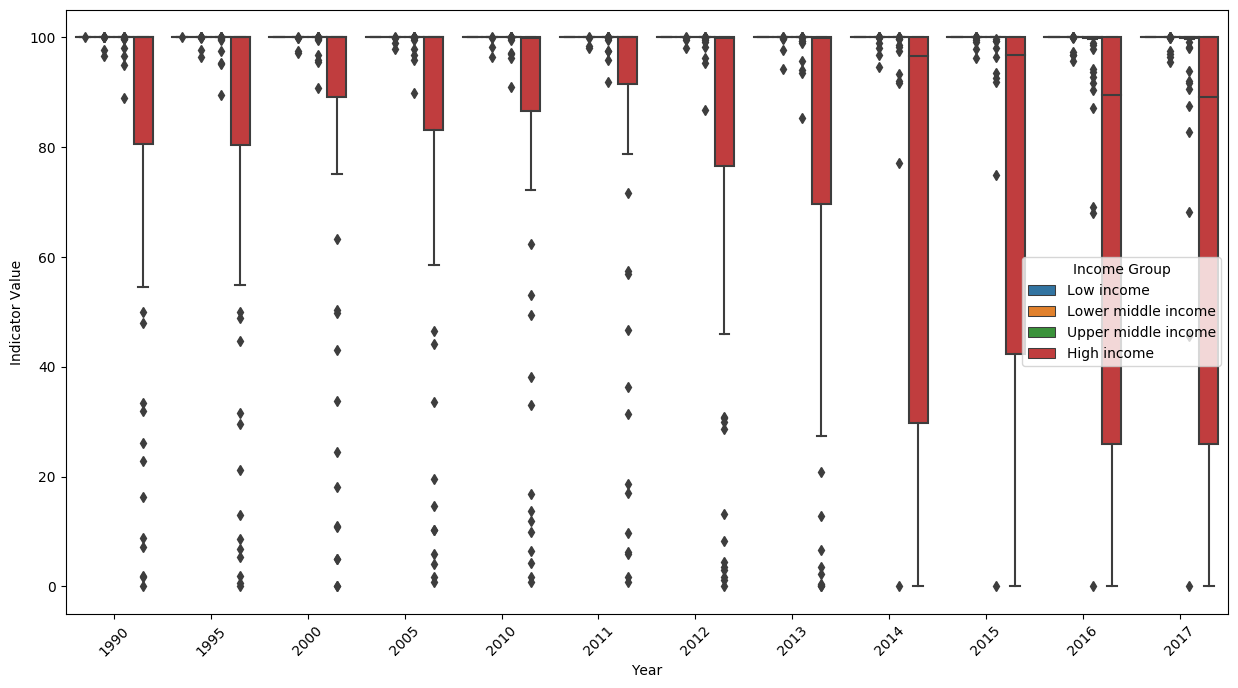

In [24]:
plt.figure(figsize=(15, 8))
order = ["Low income", "Lower middle income", "Upper middle income", "High income"]
chart = sns.boxplot(
    x="Year", y="Indicator Value", data=df91, hue="Income Group", hue_order=order
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

We can see a strong correlation between the level of income of a county and the percentage of people exposed to high levels of particle matter. It seems that the population of high-income countries tend to have lower exposition to particle matter. 

#### 9.2 (5 min)

What do you think are the causes behind the results in Exercise 9.1?

**Answer.** One possible explanation is that access to clean energy in developing countries is lower than in developed countries. Probably, the use of coal stoves and the weather conditions (poor countries are typically in the tropics) may contribute to the high amount of contamination. 

### Exercise 10: (70 min)

Finally, our client is interested in investigating the impacts and relationships between **high levels of exposure to particle matter** and **the health of the population**. Coming up with additional data for this task may be infeasible for the client, thus they have asked us to search for relevant health data in the ```WDIdata.csv``` file and work with that. 

#### 10.1 (10 min)

Which indicators present in the file  ```WDISeries.csv``` file might be useful to solve the client's question? Explain.

**Note:** Naming one or two indicators is more than enough for this question. 

**Answer.** Here is one possible solution.

Lung cancer is one of the main health issues that particle matter can cause. Thus, we can open the file ```WDISeries.csv``` and search for the appearances of the word "lung" in the file. Luckily, the following indicator showed up:


**SH.STA.AIRP.P5 :** Mortality rate attributed to household and ambient air pollution, age-standardized  (per 100,000  population)

It seems that this indicator has been calculated only for the year 2016. But still, this information might be valuable.

#### 10.2 (30 min)

Use the indicators provided in Exercise 10.1 to give valuable information to the client. 

**Answer.** Here is one possible solution.

In [25]:
# First, let us extract the indicator from WDI_data
Mortality_df = WDI_data[WDI_data["Indicator Code"] == "SH.STA.AIRP.P5"]

# For convenience we use the same transformations done in previous exercises to facilitate the study.
ids = ["Country Name", "Country Code", "Indicator Name", "Indicator Code"]
Mortality_df = pd.melt(
    Mortality_df, id_vars=ids, var_name="Year", value_name="Indicator Value"
)
Mortality_df = Mortality_df.dropna(subset=["Indicator Value"])

# Spit between regions and countries.
Regions = list(WDI_countries[WDI_countries["Region"].isnull()]["Country Code"])

# Then, we create the data frames
Mortality_C_df = Mortality_df[~Mortality_df["Country Code"].isin(Regions)]
Mortaity_R_df = Mortality_df[Mortality_df["Country Code"].isin(Regions)]

Mortality_C_df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
14831,Afghanistan,AFG,Mortality rate attributed to household and amb...,SH.STA.AIRP.P5,2016,211.1
14832,Albania,ALB,Mortality rate attributed to household and amb...,SH.STA.AIRP.P5,2016,68.0
14833,Algeria,DZA,Mortality rate attributed to household and amb...,SH.STA.AIRP.P5,2016,49.7
14836,Angola,AGO,Mortality rate attributed to household and amb...,SH.STA.AIRP.P5,2016,118.5
14837,Antigua and Barbuda,ATG,Mortality rate attributed to household and amb...,SH.STA.AIRP.P5,2016,29.9
...,...,...,...,...,...,...
15041,"Venezuela, RB",VEN,Mortality rate attributed to household and amb...,SH.STA.AIRP.P5,2016,34.6
15042,Vietnam,VNM,Mortality rate attributed to household and amb...,SH.STA.AIRP.P5,2016,64.5
15045,"Yemen, Rep.",YEM,Mortality rate attributed to household and amb...,SH.STA.AIRP.P5,2016,194.2
15046,Zambia,ZMB,Mortality rate attributed to household and amb...,SH.STA.AIRP.P5,2016,127.2


,Mortality,PM2.5_WHO
Mortality,1.000000,0.402074
PM2.5_WHO,0.402074,1.000000


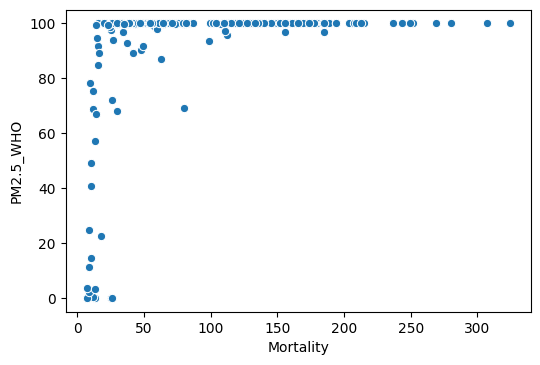

In [26]:
# Finally, we can calculate the correlation between the mortality rate and the percentage of people exposed to
# high levels of particle matter over the years.

# Mortality
df102a = Mortality_C_df[["Country Name", "Indicator Value"]]
df102a = df102a.rename(
    columns={"Country Name": "Country", "Indicator Value": "Mortality"}
)

# PM2.5WHO
df102b = Emissions_C_df[Emissions_C_df["Year"] == 2016]
df102b = df102b[df102b["Indicator Name"] == "PM2.5_WHO"]
df102b = df102b[["Country Name", "Indicator Value"]]
df102b = df102b.rename(
    columns={"Country Name": "Country", "Indicator Value": "PM2.5_WHO"}
)

# Merge and calculate the correllation
df102 = df102a.merge(df102b, how="inner", on="Country")

sns.scatterplot(x="Mortality", y="PM2.5_WHO", data=df102)
df102.corr()

The above tells us that, during 2016, the countries with large mortality rates were mostly countries where 100% of the population were exposed to high levels of particle matter in the air. The correlation doesn't necessarily hold both ways; that is, countries with low exposure levels have low mortality, but some countries with high exposure levels still have low mortality.

#### 10.3 (10 min)

Extend the analysis above to find some countries of interest. These are defined as

* The countries that have a high mortality rate due to household and ambient air pollution, but with low PM2.5 exposure
* The countries that have a low mortality rate due to household and ambient air pollution, but with high PM2.5 exposure

**Answer.** Here is one possible solution:

In [27]:
df102[(df102["PM2.5_WHO"] < 80) & (df102["Mortality"] > 20)].sort_values(by="Mortality", ascending=False).head(30)

,Country,Mortality,PM2.5_WHO
152,Sri Lanka,79.8,69.062963
22,Brazil,29.9,67.952559
126,Panama,25.8,72.134267
102,Maldives,25.6,0.000000
53,Estonia,25.0,0.000000


In [28]:
df102[df102["Mortality"] < 50].sort_values(by="PM2.5_WHO", ascending=False).head(5)

,Country,Mortality,PM2.5_WHO
2,Algeria,49.7,100.0
50,El Salvador,41.9,100.0
72,Hungary,38.8,100.0
79,Israel,15.4,100.0
4,Antigua and Barbuda,29.9,100.0


These are countries that need further investigation to find out why they run against the trend we discovered before.

#### 10.4 (15 min)

Finally, we want to look at the mortality data by income. We expect higher income countries to have lower pollution-related mortality. Find out if this assumption holds. Calculate summary statistics and histograms for each income category and note any trends.

**Answer.** Here is one possible solution:

In [29]:
# Combine the income group data with our mortality data
income_polmort = Mortality_C_df.merge(
    WDI_countries[["Country Code", "Income Group"]], how="inner", on="Country Code"
)[["Income Group", "Indicator Value"]]

# Show summary statistics grouped by income group
income_polmort.groupby("Income Group").describe().sort_values(("Indicator Value", "mean"))

Indicator Value                                       \
                              count        mean        std   min     25%   
Income Group                                                               
High income                    52.0   25.142308  19.123534   7.0   11.90   
Upper middle income            54.0   63.937037  29.618125  23.3   46.80   
Lower middle income            46.0  136.441304  55.566699  41.9  101.85   
Low income                     31.0  188.341935  52.959341  75.2  157.65   

                                            
                       50%      75%    max  
Income Group                                
High income           20.0   33.625  103.8  
Upper middle income   61.1   77.950  177.7  
Lower middle income  138.4  167.725  307.4  
Low income           193.8  212.350  324.1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124975690>,
      dtype=object)

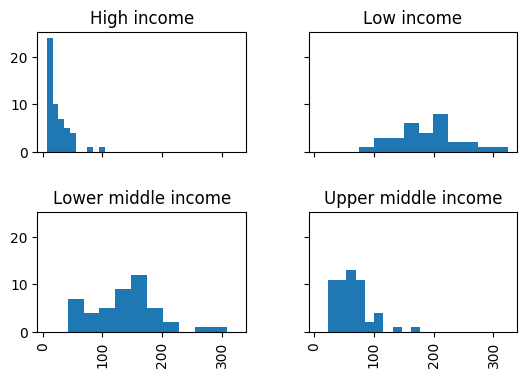

In [30]:
income_polmort["Indicator Value"].hist(
    by=income_polmort["Income Group"], sharex=True, sharey=True
)

Our assumption holds perfectly. We can see that high-income countries have lower mortality due to pollution, and that the mortality rate increases as income decreases across all statistics. The histograms show these trends too.

#### 10.5 (5 min)

At the start, we asked some questions. Based on your analysis, provide a short answer to each of these:

1. Are we making any progress in reducing the amount of emitted pollutants across the globe?
2. Which are the critical regions where we should start environmental campaigns?
3. Are we making any progress in the prevention of deaths related to air pollution?
4. Which demographic characteristics seem to correlate with the number of health-related issues derived from air pollution? 

**Answer.** Here is one possible solution:

**1. Are we making any progress in reducing the amount of emitted pollutants across the globe?**

No, we saw that trends for both the largest producers of pollutants and for the rest of the world are trending up, not down.

**2. Which are the critical regions where we should start environmental campaigns?**

The East Asia and Pacific regions showed the most worrying trends, and we should start environmental campaigns there.

**3. Are we making any progress in the prevention of deaths related to air pollution?**

As we only had data for 2016, we can't make any strong conclusions here. However we found several countries which had low mortality in spite of their high levels of exposure to pollution, and these would be a good place to start looking for solutions to health issues.

**4. Which demographic characteristics seem to correlate with the number of health-related issues derived from air pollution?**

The income of countries is strongly correlated with pollution-related mortality.